In [68]:
import pandas as pd
import dash
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import plotly.express as px

In [69]:
engine=create_engine("sqlite:///"+r"C:\Users\19193\Documents\BootCamp\Is_Starbucks_your_cup_of_coffee\Starbucks.sqlite")
conn=engine.connect()

In [70]:
result=pd.read_csv(r"C:\Users\19193\Documents\BootCamp\Is_Starbucks_your_cup_of_coffee\profile.csv")
result
result.describe()

,age,income
count,17000.000000,14825.000000
mean,62.531412,65404.991568
std,26.738580,21598.299410
min,18.000000,30000.000000
25%,45.000000,49000.000000
50%,58.000000,64000.000000
75%,73.000000,80000.000000
max,118.000000,120000.000000


In [72]:
result.dtypes
result['income'].isnull().sum()
result['gender'].isnull().sum()

0

In [74]:
#drop null records where age=118 
result.drop(result[result.age==118].index, inplace=True)
result.describe()
result.isnull()

,gender,age,income,sex
1,False,False,False,False
3,False,False,False,False
5,False,False,False,False
8,False,False,False,False
12,False,False,False,False
...,...,...,...,...
16995,False,False,False,False
16996,False,False,False,False
16997,False,False,False,False
16998,False,False,False,False


In [73]:
#create another variable and code F,M , O
result['sex']=result['gender'].replace(['F','M','O'],['Female','Male','Other'])
result

,gender,age,income,sex
1,F,55,112000.0,Female
3,F,75,100000.0,Female
5,M,68,70000.0,Male
8,M,65,53000.0,Male
12,M,58,51000.0,Male
...,...,...,...,...
16995,F,45,54000.0,Female
16996,M,61,72000.0,Male
16997,M,49,73000.0,Male
16998,F,83,50000.0,Female


In [75]:
#drop column
result.drop(['gender'],axis=1)


,age,income,sex
1,55,112000.0,Female
3,75,100000.0,Female
5,68,70000.0,Male
8,65,53000.0,Male
12,58,51000.0,Male
...,...,...,...
16995,45,54000.0,Female
16996,61,72000.0,Male
16997,49,73000.0,Male
16998,83,50000.0,Female


In [81]:
incomeavg=result.groupby(['age','sex'], as_index=False)['income'].mean().round(0)

incomeavg.head(57)

,age,sex,income
0,18,Female,51286.0
1,18,Male,49964.0
2,19,Female,53871.0
3,19,Male,49654.0
4,20,Female,53171.0
5,20,Male,49229.0
6,20,Other,54750.0
7,21,Female,49780.0
8,21,Male,50365.0
9,21,Other,54667.0


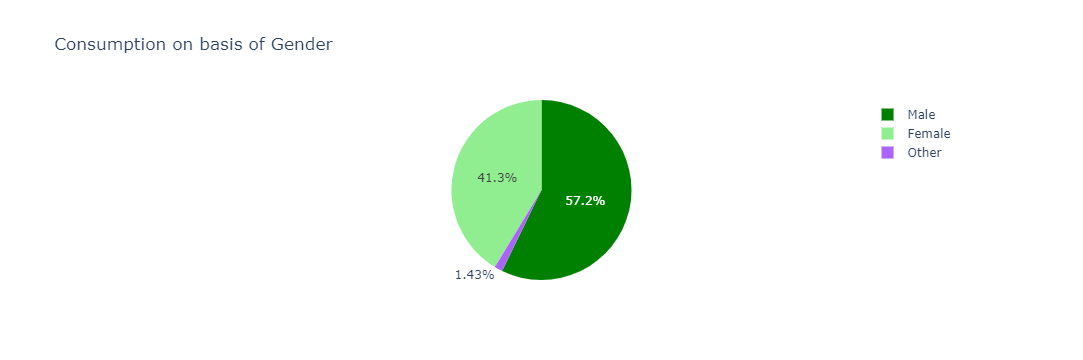

In [76]:
# Who usually spend more at Starbucks, female or male?
sum_t=result.groupby(['sex'], as_index=False)['income'].count().round(0)
sum_t.head()


fig = px.pie(sum_t, values='income' ,color='sex',names='sex',title='Consumption on basis of Gender',
             labels={"sex":"Gender", "income":"Count"},
             color_discrete_map={'Male':'green',
                                 'Female':'lightgreen',
                                 'Unknown':'#8c564b'}
            )
#fig.update_traces(textinfo='percent+label')
fig.show()
fig.write_html("pisexcnt.html")

In [85]:
#create a range for ages
bins = [18, 30, 40, 50, 60, 70, 80, 90, 120]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-90','90+'] 
result['age_range'] = pd.cut(result.age, bins, labels = labels,include_lowest = True)
result

,gender,age,income,sex,age_range
1,F,55,112000.0,Female,50-59
3,F,75,100000.0,Female,70-79
5,M,68,70000.0,Male,60-69
8,M,65,53000.0,Male,60-69
12,M,58,51000.0,Male,50-59
...,...,...,...,...,...
16995,F,45,54000.0,Female,40-49
16996,M,61,72000.0,Male,60-69
16997,M,49,73000.0,Male,40-49
16998,F,83,50000.0,Female,80-90


In [86]:
# percentage of age_range
age_range_percentage = result['age_range'].value_counts()/len(result['age_range'])*100 # calculates the percentages of all age ranges
age_range_percentage.head(10)

50-59    24.215852
60-69    19.629005
40-49    16.128162
18-29    11.500843
70-79    11.102867
30-39    10.772344
80-90     5.173693
90+       1.477234
Name: age_range, dtype: float64

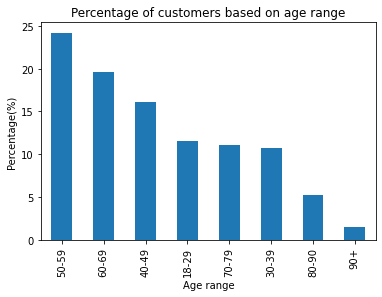

In [87]:
age_range_percentage.plot(kind="bar")
plt.title("Percentage of customers based on age range")
plt.ylabel("Percentage(%)")
plt.xlabel("Age range")
plt.show()


In [88]:
#create range for income
bin_i=[30000, 45000, 60000, 75000, 90000, 105000, 140000]
labels_i=['30000-44999', '45000-59999', '60000-74999', '75000-89999','90000-104999','120000+']
result['income_range'] = pd.cut(result.income, bins=bin_i, labels = labels_i,include_lowest = True) 

In [89]:
result.head(100)

,gender,age,income,sex,age_range,income_range
1,F,55,112000.0,Female,50-59,120000+
3,F,75,100000.0,Female,70-79,90000-104999
5,M,68,70000.0,Male,60-69,60000-74999
8,M,65,53000.0,Male,60-69,45000-59999
12,M,58,51000.0,Male,50-59,45000-59999
...,...,...,...,...,...,...
119,M,57,46000.0,Male,50-59,45000-59999
120,F,51,56000.0,Female,50-59,45000-59999
123,F,64,37000.0,Female,60-69,30000-44999
124,M,71,57000.0,Male,70-79,45000-59999


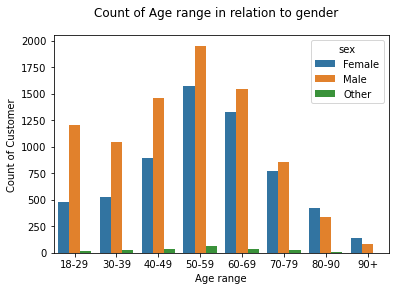

In [90]:
# countplot plots the count of the number of records by category
cnt = sns.countplot(x="age_range", hue="sex", data=result) # plots a bar chart 
cnt.set(xlabel= "Age range", ylabel= "Count of Customer") # labels axis
plt.suptitle("Count of Age range in relation to gender"); # title of plot


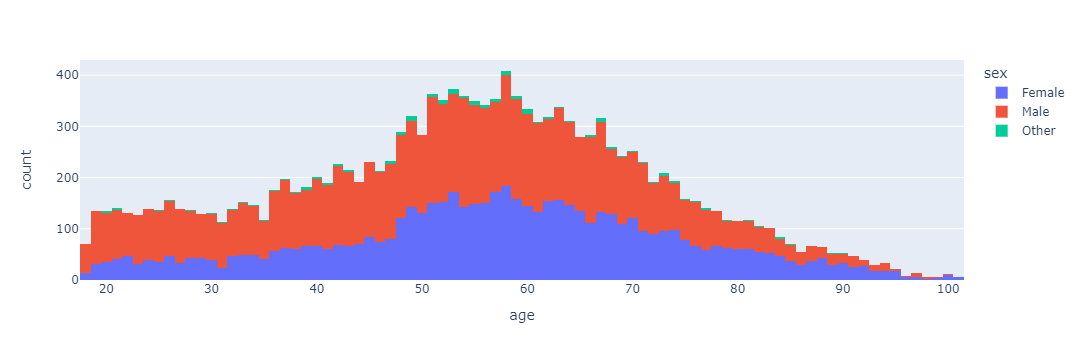

In [91]:
result.sort_values(
 by="age",
ascending=False
)
fig = px.histogram(result, x='age',color='sex')
fig.show()

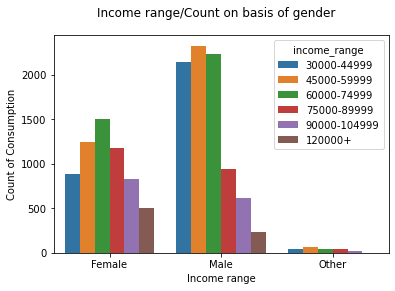

In [92]:
# countplot plots the count of the number of records by category
cnt = sns.countplot(x="sex", hue="income_range", data=result) # plots a bar chart 
cnt.set(xlabel= "Income range", ylabel= "Count of Consumption") # labels axis
plt.suptitle("Income range/Count on basis of gender"); # title of plot


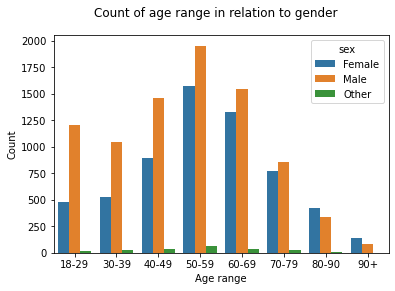

In [93]:
cnt = sns.countplot(x="age_range", hue="sex", data=result) # plots a bar chart 
cnt.set(xlabel= "Age range", ylabel= "Count") # labels axis
plt.suptitle("Count of age range in relation to gender"); # title of plot

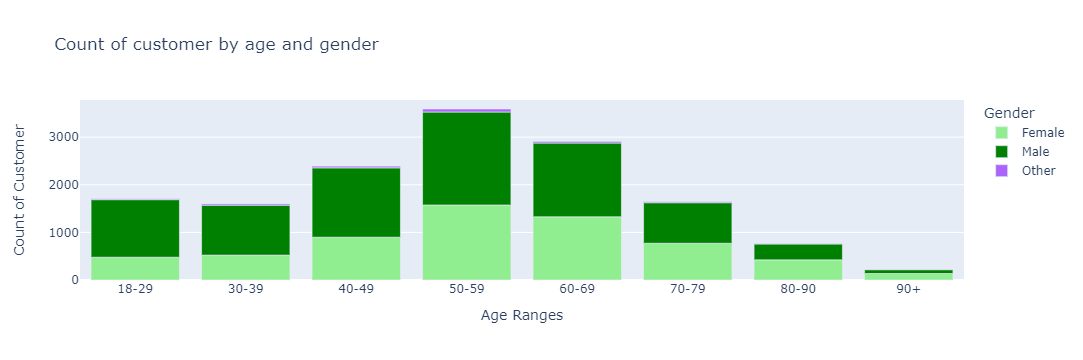

In [94]:
#get count on basis of age_range and sex;
#Who usually spend more at Starbucks, female or male?
group = result.groupby(['age_range', 'sex'])
  
# size of group to count observations
group = group.size()
group.head()
  
# make a column name 
grp=group.reset_index(name='count')


fig = px.bar(grp, x="age_range", y="count", color="sex", title="Count of customer by age and gender",
    labels={ "sex": "Gender",  "age_range": "Age Ranges", "count": "Count of Customer"},
             color_discrete_map={'Male':'green',
                                 'Female':'lightgreen',
                                 'Unknown':'#8c564b'})

px.pie(grp, values='count', names='age_range', title='Customer Age Range Count',hole=0.5, labels={'count':'Count',"income_range":"Income Range"})
fig.show()
fig.write_html("agerange_sex.html")

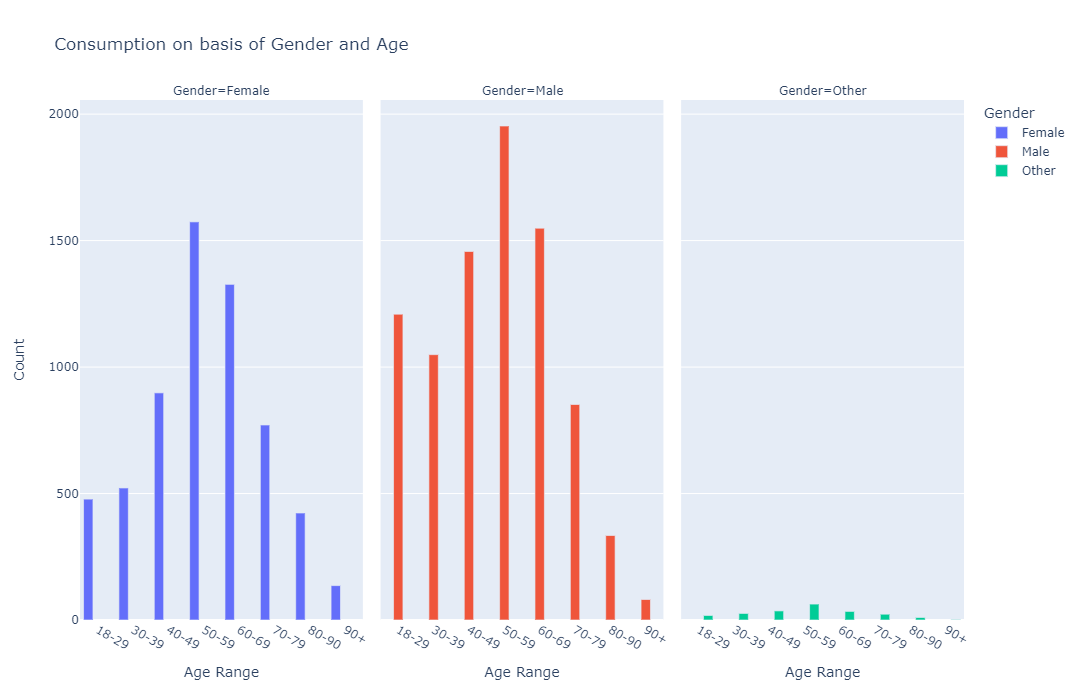

In [95]:
fig = px.bar(grp, x="age_range", color="sex",
             y='count',
             title="Consumption on basis of Gender and Age",
             barmode='group',
             height=700,
             facet_col="sex",
             labels={"sex":"Gender", "count":"Count","age_range":"Age Range"}
            )

fig.show()
fig.write_html("IndGenAge.html")

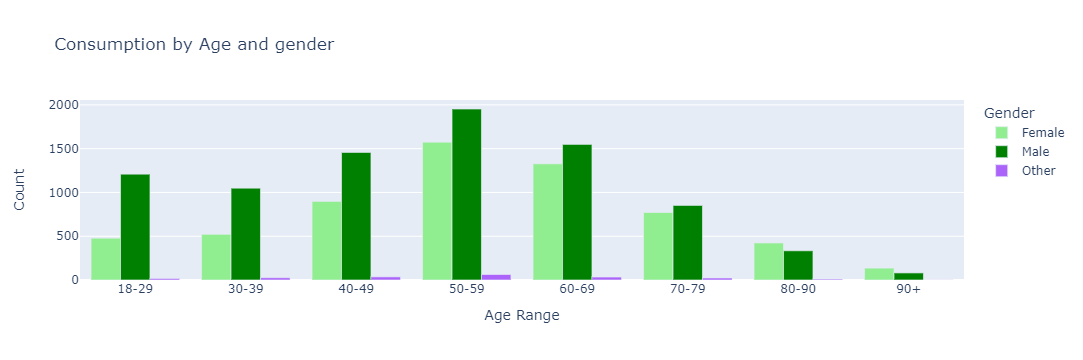

In [96]:
#How old are most of Starbucks customers with respect to gender?

#Majority of consumption of starbucks is done by 40-70 years old.
#I generally noticed that 24% of customers were people aged between 50 to 59 which is higher than all customers
#aged between 18 to 39 year (22%). The second largest group were those aged between 60 to 69 which accounted for 20%. 

#coustmer ate older than male .
fig = px.bar(grp, x="age_range", y="count",title="Consumption by Age and gender",
             color='sex', barmode='group', labels={"sex":"Gender", "count":"Count","age_range":"Age Range"},
             color_discrete_map={'Male':'green',
                                 'Female':'lightgreen',
                                 'Unknown':'#8c564b'})
fig.show()
fig.write_html("barAgeSex.html") 

In [97]:
test=result.groupby(['age'], as_index=False)['income'].sum().round(0)

incomeavg.head(57)

,age,sex,income
0,18,Female,51286.0
1,18,Male,49964.0
2,19,Female,53871.0
3,19,Male,49654.0
4,20,Female,53171.0
5,20,Male,49229.0
6,20,Other,54750.0
7,21,Female,49780.0
8,21,Male,50365.0
9,21,Other,54667.0


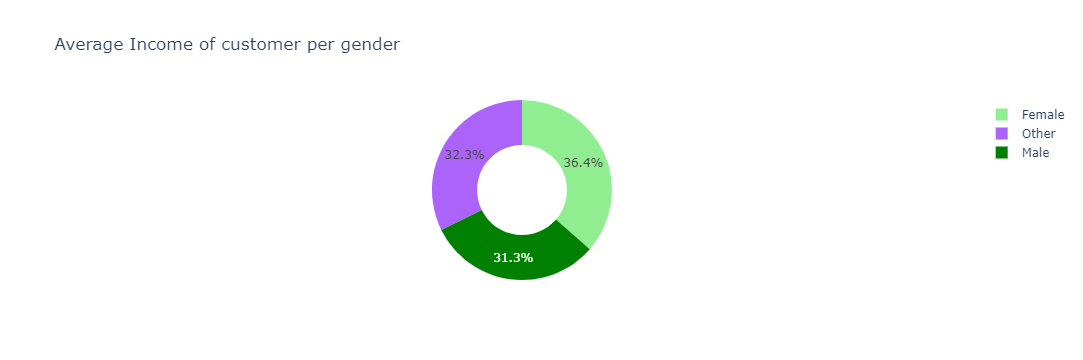

In [22]:
# For the customers who spend more; Who makes more income per year?
#We can see that, on average, male customers earn less than female customers do in a year. 
# We can see that, on average, male customers earn less than female customers do in a year. In fact,
# female customers earn more than the average income per year for all gender types. While female customers
# make, on average, around 71k a year, male customers make, on average, around 61k.
avg_i=result.groupby(['sex'], as_index=False)['income'].mean().round(0)

fig = px.pie(avg_i, values='income' ,color='sex', names='sex',title='Average Income of customer per gender',
             labels={"sex":"Gender", "income":"Average Income"},hole=0.5,
             color_discrete_map={'Male':'green',
                                 'Female':'lightgreen',
                                 'Unknown':'#8c564b'})


# fig.update_traces(textposition='inside')
# fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()
fig.write_html("avgsexinc.html")
                                                             #We can see that, on average, male customers earn less than female customers do in a year. 
# We can see that, on average, male customers earn less than female customers do in a year. In fact,
# female customers earn more than the average income per year for all gender types. While female customers
# make, on average, around 71k a year, male customers make, on average, around 61k.

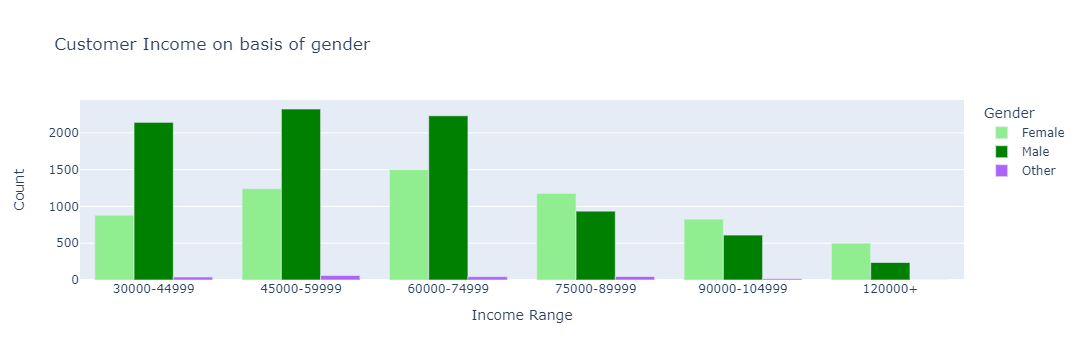

In [98]:
#get count on basis of age_range and sex;
#the majority of our customers make between 45k and 75k. 
#the minority are making more than 100k per year,
#I generally noticed that 24% of customers were people aged between 50 to 59 which is higher than all 
#customers aged between 18 to 39 year (22%). The second largest group were those aged between 60 to 69 which accounted for 20%. Does this mean that young people don’t drink much coffee?
group = result.groupby(['income_range', 'sex'])
  
# size of group to count observations
group = group.size()
  
# make a column name 
grp_income=group.reset_index(name='count')
grp_income

fig = px.bar(grp_income, x="income_range", y="count",
             color='sex', barmode='group',title='Customer Income on basis of gender',
             labels={'sex':'Gender','count':'Count ',"income_range":"Income Range"},
             color_discrete_map={'Male':'green',
                                 'Female':'lightgreen',
                                 'Unknown':'#8c564b'})
fig.show()
fig.write_html("barIncomeAGe.html")
#the majority of our customers make between 45k and 75k. 
#the minority are making more than 100k per year,


In [24]:
result.head(50)

,gender,age,income,sex,age_range,income_range
1,F,55,112000.0,Female,50-59,120000+
3,F,75,100000.0,Female,70-79,90000-104999
5,M,68,70000.0,Male,60-69,60000-74999
8,M,65,53000.0,Male,60-69,45000-59999
12,M,58,51000.0,Male,50-59,45000-59999
13,F,61,57000.0,Female,60-69,45000-59999
14,M,26,46000.0,Male,18-29,45000-59999
15,F,62,71000.0,Female,60-69,60000-74999
16,M,49,52000.0,Male,40-49,45000-59999
18,M,57,42000.0,Male,50-59,30000-44999


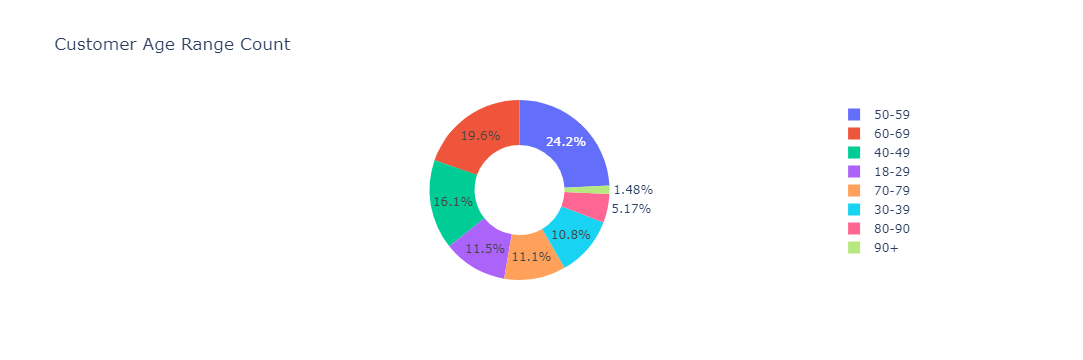

In [25]:
fig = px.pie(grp, values='count', names='age_range', title='Customer Age Range Count',hole=0.5, labels={'count':'Count',"income_range":"Income Range"})
fig.show()
fig.write_html("pieage.html")


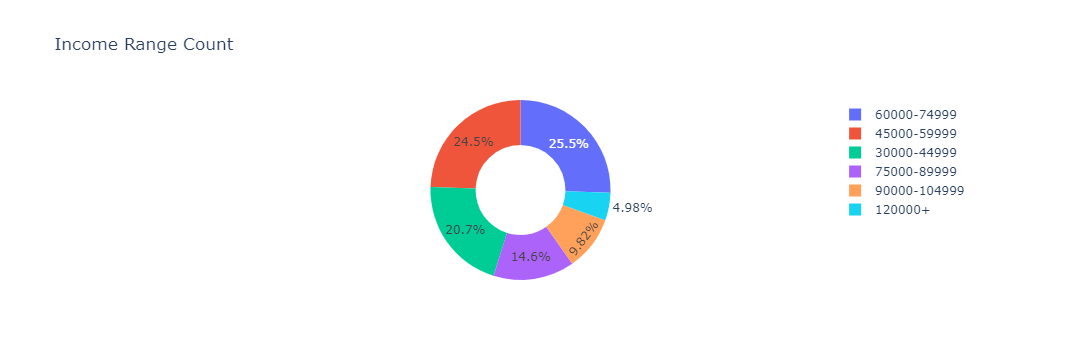

In [54]:
fig = px.pie(grp_income, values='count', names='income_range', title='Income Range Count',hole=0.5,custom_data=['sex','count'],
             labels={'count':'Count',"income_range":"Income Range"})

fig.show()

fig.write_html("pieincome_.html")


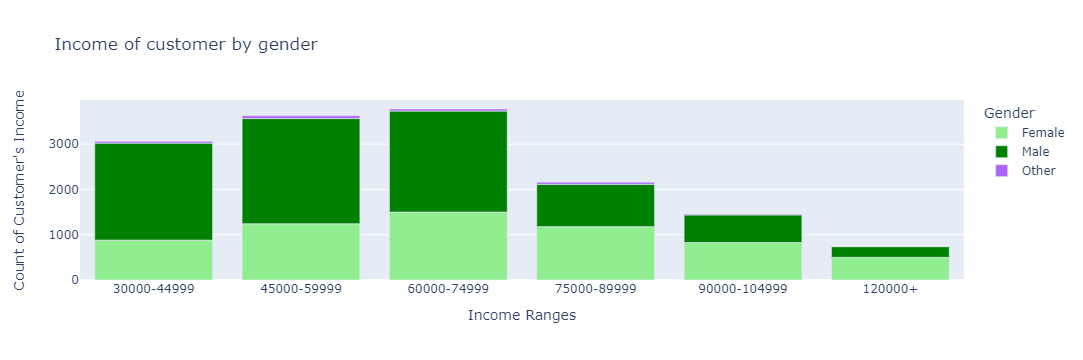

In [27]:
fig = px.bar(grp_income, x="income_range", y="count", color="sex", title="Income of customer by gender",
    labels={ "sex": "Gender",  "income_range": "Income Ranges", "count": "Count of Customer's Income"},
             color_discrete_map={'Male':'green',
                                 'Female':'lightgreen',
                                 'Unknown':'#8c564b'})


fig.show()
fig.write_html("incomerange_sex.html")

In [28]:
result.income.median()

64000.0

In [106]:
incomeavg=result.groupby(['age_range'], as_index=False)['income'].mean().round(0)

incomeavg.head(57)
grouped_multiple =result.groupby(['age_range', 'sex']).agg({'income': ['mean', 'min', 'max','sum']})
grouped_multiple.columns = ['age_mean', 'age_min', 'age_max','income_sum']
grouped_multiple = grouped_multiple.reset_index()
print(grouped_multiple)

   age_range     sex      age_mean  age_min   age_max   income_sum
0      18-29  Female  51742.677824  30000.0   75000.0   24733000.0
1      18-29    Male  50763.440860  30000.0   75000.0   61373000.0
2      18-29   Other  46833.333333  30000.0   67000.0     843000.0
3      30-39  Female  56080.459770  30000.0  100000.0   29274000.0
4      30-39    Male  53758.817922  30000.0  100000.0   56393000.0
5      30-39   Other  55923.076923  31000.0   89000.0    1454000.0
6      40-49  Female  67667.037862  30000.0  119000.0   60765000.0
7      40-49    Male  60205.216198  30000.0  119000.0   87719000.0
8      40-49   Other  65888.888889  30000.0  100000.0    2372000.0
9      50-59  Female  76233.163914  30000.0  120000.0  119991000.0
10     50-59    Male  66033.794163  30000.0  120000.0  128964000.0
11     50-59   Other  71206.349206  32000.0  100000.0    4486000.0
12     60-69  Female  76680.482291  30000.0  120000.0  101755000.0
13     60-69    Male  64790.187218  30000.0  120000.0  1003600

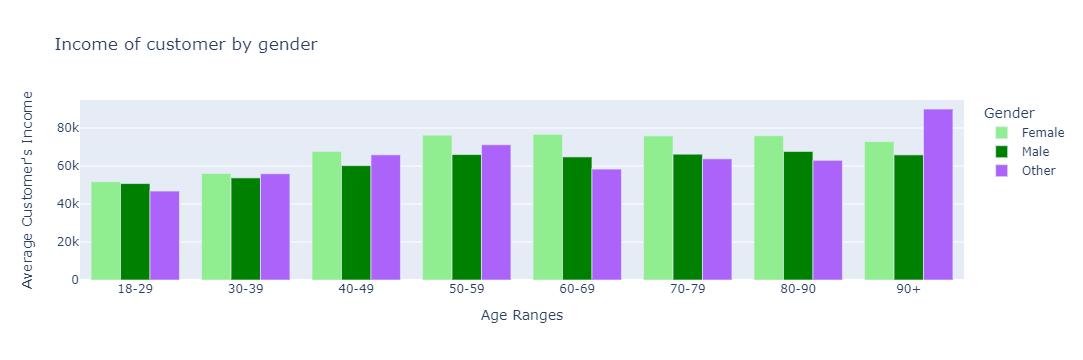

In [103]:
fig = px.bar(incomeavg, x="age_range", y="income",barmode='group', color="sex", title="Income of customer by gender",
    labels={ "sex": "Gender",  "age_range": "Age Ranges", "income": "Average Customer's Income"},
             color_discrete_map={'Male':'green',
                                 'Female':'lightgreen',
                                 'Unknown':'#8c564b'})


fig.show()